MCMC-basics
===========


Step One : Monte-Carlo (25 minutes)
-----------------------------------

#### Motivating example : which (somehow low dimension) unit d-ball has the largest volume? 

### Motivating example:

* Given an integer $d$ smaller than $15$, we are interested in the volume of the unit ball of dimension $d$.


* Intuition: 
    * the circle ($d=2$) has a volume of $\pi$.
    * the sphere ($d=3$) has a volume of $\frac{4}{3}\pi$.
    * does it keep growing with $d$? 


* if you want an exact value of the volume of the unit n-ball, it is: $$V_{n}={\frac {\pi ^{\frac {n}{2}}}{\Gamma \left({\frac {n}{2}}+1\right)}}$$ where $\Gamma$ is Euler function - just to say that the aim here is not to get the real value but to have fun with Monte-Carlo Methods.

Monte-Carlo (MC) methods:
-------------------------

* used to estimate an expectation.
* based upon an application of the Strong Law of Large Numbers for estimation ...
* and on the Limit Central Theorem for error control.
* Several variance-reduction techniques are available in the literature.



Notations:
----------

* Let us have $E\subset\mathbb{R}^{d}\rightarrow\mathbb{R}$
* and some function  $\varphi(.)$ from $E$
* and finally $\mathbf{X}$ is a $d-$dimensional random vector (with known
density $f_{\mathbf{X}}$). 



* meaning we are restricted to a 1-dimensional output

These methods:
* allow the estimation of an expectation of form:

\begin{equation}
I=\mathbb{E}[\varphi(\mathbf{X})]
\end{equation}

* or on the integral form:

\begin{equation}
I=\int_{E}\varphi(\mathbf{x})f_{\mathbf{X}}(\mathbf{x})d\mathbf{x}
\end{equation}

* (these are the same things)
* (given that the integral exists)

Crude MC:
---------


* The main idea of this method is to generate a large number of *i.i.d.*
vectors with density $f_{\mathbf{X}}$, then to estimate $I$ with
the empirical mean of the $N$ values. 

* The Strong Law of Large Numbers allows to get an unbiased estimator of $I$:


\begin{equation}
\hat{I}_N=\frac{1}{N}\sum_{i=1}^{N}\varphi(\mathbf{X}^{i})
\end{equation}

 * where $\mathbf{X}^{i}$ are i.i.d with $f_{\mathbf{X}}$.
 * $\hat{I}_N$ is a r.v. with expectation $I$.

 * $\hat{I}_N$ will sometimes represent the realization of this estimator given a sample $\mathbf{x}^{(i..N)}$, it can lead to some confusion.
 * should it be $\hat{I}_{N,n}$? (open question on notation) ...

### Example of Crude MC: estimating $\pi$

* We take E the unit square:
\begin{equation}
E = [-1,1]^{2}
\end{equation}

    

* We define the function $\varphi$ as "is my point in the unit circle"?
$$\varphi(\mathbf{x}) = 1_{\lVert \mathbf{x} \lVert_2 \leq 1}$$


* we set  $\mathbf{X} \sim \mathcal{U} [-1,1]^2$ so that 
$$
\begin{aligned}
f_{\mathbf{X}}(\mathbf{x}) &= f_{\mathbf{X}}(x_1,x_2)  \\
&= \frac{1}{2} 1_{\mathbf{x_1} \in [-1,1]} \frac{1}{2} 1_{\mathbf{x_2} \in [-1,1]}   \\
&= \frac{1}{4} 1_{\mathbf{x} \in E} 
\end{aligned}$$
* (the support of $f_{\mathbf{X}}$ is E so it eases the notations).


$$
\begin{aligned}I &=\int_{E}\varphi(\mathbf{x})f_{\mathbf{X}}(\mathbf{x})d\mathbf{x} \\
                 &=\int_{E} 1_{\lVert x \lVert_2 \leq 1}\frac{1}{4} 1_{\mathbf{x} \in E}  d\mathbf{x}  \\
                 &=\frac{\pi}{4}
\end{aligned}
$$

* since the surface of the circle of radius 1 is $\pi$.


* thus $\hat{\pi} = 4 \hat{I}$


* to get (a realization of) $\hat{I}_N$ we will just throw uniformly $N$ random points in $E$, count the number of which that lies in the unit circle. (A realization of) $\hat{I}_N$ is that number divided by $N$.

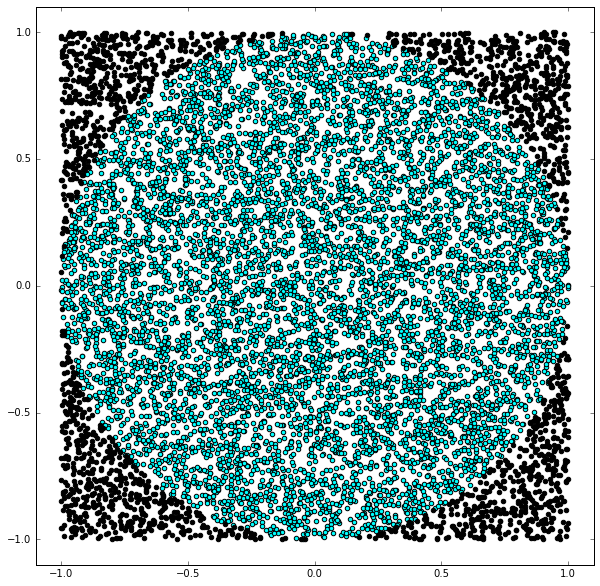

(a realization of) I_hat_N is : 0.7791.
(a realization of) pi_hat_N is : 3.1164.


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 10000
x = np.random.uniform(-1,1,(N,2))
in_circle = np.sqrt(np.square(x[:,0])+np.square(x[:,1]))<=1

plt.figure(figsize=(10, 10))
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.scatter(x[in_circle,0],x[in_circle,1],c='cyan')
plt.scatter(x[~in_circle,0],x[~in_circle,1],c='black')
plt.show()
I_hat = np.sum(in_circle)/N
print("(a realization of) I_hat_N is : {}.".format(I_hat))
print("(a realization of) pi_hat_N is : {}.".format(I_hat*4))

* The variance of the estimator of $\mathbb{E}[\varphi(\mathbf{X})]$ (that is the variance of $\hat{I}_N$):
is:
\begin{equation}
\mbox{Var }[\hat{I}_N]=\frac{1}{N}\mbox{Var}[\varphi(\mathbf{X})]
\end{equation}



* and it can be estimated by:
\begin{equation}
\widehat{\mbox{Var }}[\hat{I}]=\frac{1}{N-1}\left[\frac{1}{N}\sum_{i=1}^{N}\varphi^{2}(\mathbf{X}^{i})-\hat{I}^{2}_N\right]
\end{equation}

* still, be careful about "is it the r.v. or the realization of this r.v."

So an estimation of the variance $I_hat_N$ is:

In [134]:
N = 10000
x_1 = np.random.uniform(-1,1,(N,2))
in_circle = np.sqrt(np.square(x_1[:,0])+np.square(x_1[:,1]))<=1
I_hat = np.sum(in_circle)/N
# note that we use another sample for the 2 parts of the estimator. a bit overkill with our sample size.
x_2 = np.random.uniform(-1,1,(N,2))
in_circle_square = np.sqrt(np.square(x_2[:,0])+np.square(x_2[:,1]))<=1
squarephi = np.sum(in_circle_square)/N
# take a moment to understand why the function is the same when squared

Var_hat=(squarephi-I_hat*I_hat)/(N-1)
print("(a realization of) I_hat_N is : {}.".format(I_hat))
print("Var_hat is : {}.".format(Var_hat))
print()
print("the associated estimation pi_hat_N is : {}.".format(I_hat*4))
print("By composition, the estimation of the variance of pi_hat_N is : {}.".format(Var_hat*4*4))

(a realization of) I_hat_N is : 0.779.
Var_hat is : 1.7697669766976696e-05.

the associated estimation pi_hat_N is : 3.116.
By composition, the estimation of the variance of pi_hat_N is : 0.00028316271627162713.


One can build confidence intervals thanks to TLC:
* ugly plug in of the estimation of tha variance as the original variance since our $N$ is "large".


In [91]:
I_sup = I_hat + 1.96 * np.sqrt(Var_hat)
I_inf = I_hat -1.96 * np.sqrt(Var_hat)

print("there is a 95% probability that pi/4 is in [{:f},{:f}]".format(I_inf,I_sup))
print("pi/4=",np.pi/4)
print(np.pi/4>I_inf and np.pi/4<I_sup)


there is a 95% probability that pi/4 is in [0.781223,0.792577]
pi/4= 0.7853981633974483
True


In [112]:
%%time 

from numba import jit, int32, float32
@jit(int32(int32))
def getI_fast(N):
    x_i = np.random.uniform(-1,1,(N,2))
    in_circle = np.sqrt(np.square(x_i[:,0])+np.square(x_i[:,1]))<=1 
    I_hat=np.sum(in_circle)/N
    Var_hat=(I_hat-I_hat*I_hat)/(N-1) # not using 2 samples anymore
    I_sup = I_hat + 1.96 * np.sqrt(Var_hat)
    I_inf = I_hat -1.96 * np.sqrt(Var_hat)
    return np.pi/4>I_inf and np.pi/4<I_sup
    
M = 10000
in_c = 0
for _ in range(M):
    I_hat_loc = getI_fast(N)
    in_c+=I_hat_loc

print(in_c/M)

0.9511
Wall time: 5.29 s


Todo: calcul N balls 1..10, avec 95 est. On voit variance up; besoin de techniques de base pour réduire variance.

In [132]:
@jit((float32,float32),(int32,int32))
def getdballvolume(N,d):
    volume_unit = 2**d
    x = np.random.uniform(-1,1,(N,d))
    norm = 0
    for i in range(d):
        norm += np.square(x[:,i])
    in_ball = np.sqrt(norm)<=1 
    I_hat=np.sum(in_ball)/N 
    Var_hat=(I_hat-I_hat*I_hat)/(N-1)
    return I_hat* 2**d, Var_hat* 2**d* 2**d

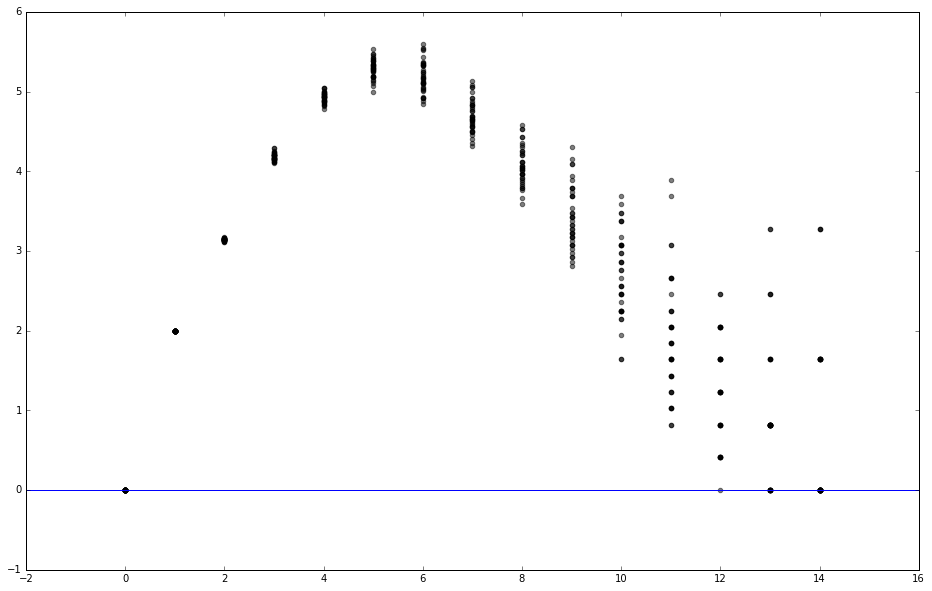

In [157]:
plt.figure(figsize=(16,10))

li, lv ={},{}
nloop = 40
for d in range(15):
    li[d] = []
    lv[d] = []
    for loop in range(nloop):
        i,v=getdballvolume(10000,d)
        li[d].append(i)
        lv[d].append(v)     
    plt.scatter(np.tile(d,nloop),li[d],c='k',alpha=.5)
    
plt.axhline(0)
plt.show()   

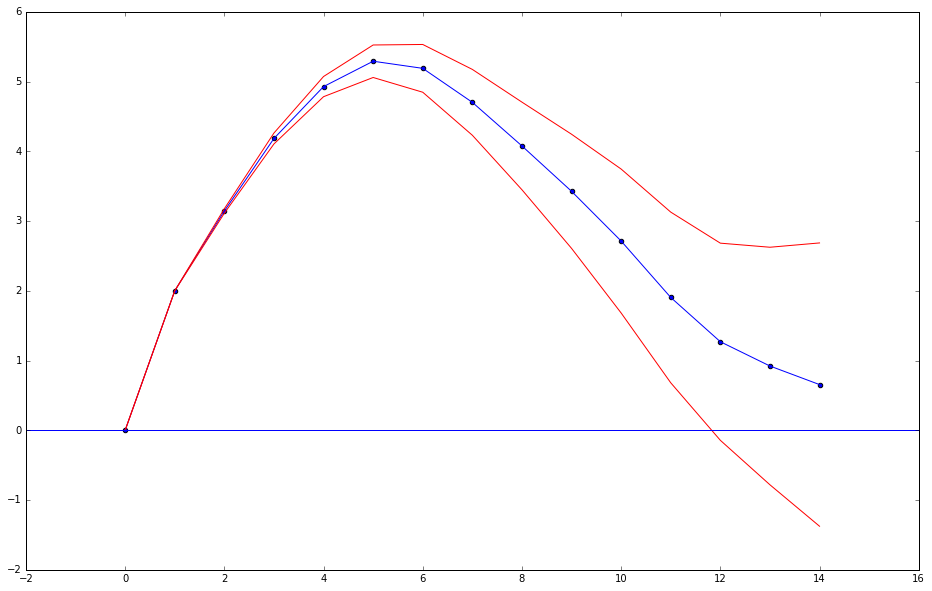

In [162]:
plt.figure(figsize=(16,10))
plt.plot(range(15),[np.mean(li[d]) for d in range(15)])
plt.scatter(range(15),[np.mean(li[d]) for d in range(15)])
plt.plot(range(15),[np.mean(li[d])+1.96*np.sqrt(np.mean(lv[d])) for d in range(15)],c="r")
plt.plot(range(15),[np.mean(li[d])-1.96*np.sqrt(np.mean(lv[d])) for d in range(15)],c="r")
plt.axhline(0)
plt.show()

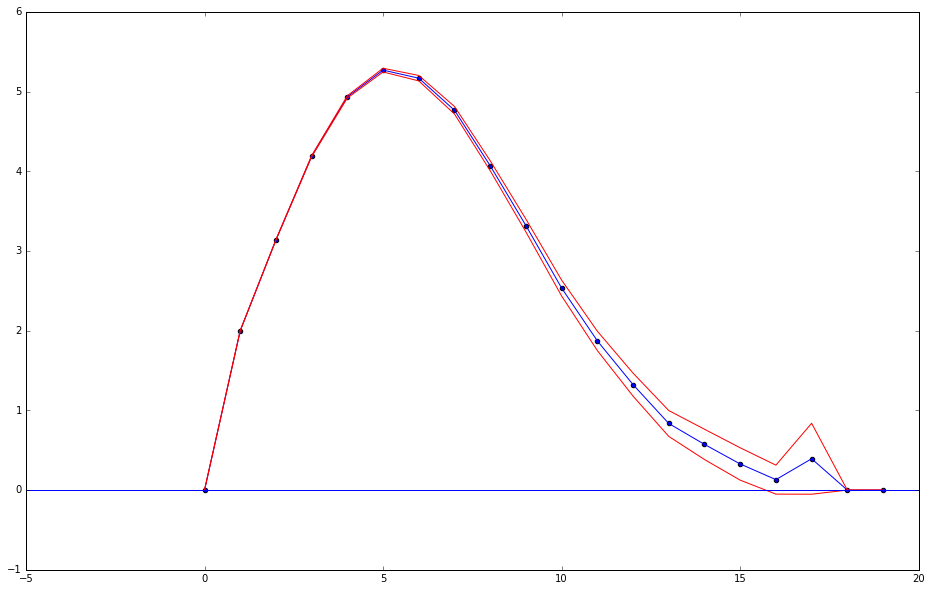

In [169]:
dmax=20
li, lv ={},{}
nloop = 1
for d in range(dmax):
    li[d] = []
    lv[d] = []
    for loop in range(nloop):
        i,v=getdballvolume(1000000,d)
        li[d].append(i)
        lv[d].append(v) 
        
plt.figure(figsize=(16,10))
plt.plot(range(dmax),[np.mean(li[d]) for d in range(dmax)])
plt.scatter(range(dmax),[np.mean(li[d]) for d in range(dmax)])
plt.plot(range(dmax),[np.mean(li[d])+1.96*np.sqrt(np.mean(lv[d])) for d in range(dmax)],c="r")
plt.plot(range(dmax),[np.mean(li[d])-1.96*np.sqrt(np.mean(lv[d])) for d in range(dmax)],c="r")
plt.axhline(0)
plt.show()